In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [80]:
data = pd.read_csv('../data/processed.csv', index_col=0)
print(data.info())
data.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 443 entries, (주)서울에너지 직영 to HD현대오일뱅크㈜직영 연세주유소
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상표      443 non-null    object 
 1   자치구     443 non-null    object 
 2   셀프여부    443 non-null    object 
 3   고급휘발유   234 non-null    float64
 4   휘발유     439 non-null    float64
 5   경유      439 non-null    float64
 6   실내등유    138 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.7+ KB
None


,상표,자치구,셀프여부,고급휘발유,휘발유,경유,실내등유
상호,,,,,,,
(주)서울에너지 직영,S-OIL,성동구,Y,NaN,1545.0,1375.0,NaN
정호주유소,자가상표,성동구,N,NaN,1545.0,1374.0,NaN
HD현대오일뱅크㈜직영 성동셀프주유소,현대오일뱅크,성동구,Y,2085.0,1565.0,1395.0,NaN


<Axes: xlabel='셀프여부', ylabel='휘발유'>

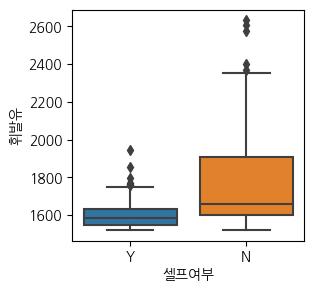

In [81]:
plt.figure(figsize=(3, 3))
sns.boxplot(data, x="셀프여부", y="휘발유")

In [82]:
pd.pivot_table(data, index="자치구", values=["고급휘발유", "휘발유", "경유", "실내등유"], aggfunc=np.mean) \
    .sort_values(by="휘발유") \
    .head(5)

,경유,고급휘발유,실내등유,휘발유
자치구,,,,
강북구,1383.500000,1825.000000,1400.000000,1549.333333
도봉구,1399.600000,1946.400000,1409.000000,1566.533333
은평구,1447.500000,1803.250000,1466.500000,1568.062500
동대문구,1403.777778,1789.500000,1482.857143,1573.555556
서대문구,1452.133333,1863.285714,1695.000000,1574.533333
